In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras import datasets, layers, models, losses, Model

In [2]:
train_gen=ImageDataGenerator(rescale=1./255.,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            shear_range=0.2)
valid_gen=ImageDataGenerator(rescale=1./255.)
test_gen=ImageDataGenerator(rescale=1./255.)
train_Data=train_gen.flow_from_directory("dataset/train",target_size=(224,224),batch_size=32,class_mode="binary")
valid_Data=valid_gen.flow_from_directory("dataset/val",target_size=(224,224),batch_size=32,class_mode="binary")
#test_Data=test_gen.flow_from_dataframe(test_df,x_col='filename',y_col='labels',target_size=(150,150),batch_size=32,class_mode="binary")

Found 3351 images belonging to 2 classes.
Found 1174 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications.vgg16 import VGG16

In [4]:
base_model = VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

2022-06-22 09:48:52.115124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 09:48:52.190069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 09:48:52.191529: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 09:48:52.194390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [5]:
for layer in base_model.layers:
  layer.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(516, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(516, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation = 'sigmoid')(x)
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [7]:
head_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
history = head_model.fit(train_Data, batch_size=64, epochs=50, validation_data=valid_Data)


Epoch 1/50


2022-06-22 09:48:58.250810: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.
2022-06-22 09:48:58.969918: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2022-06-22 09:49:01.916422: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-06-22 09:49:01.916766: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-06-22 09:49:02.021468: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allo

  3/105 [..............................] - ETA: 37s - loss: 1.9139 - accuracy: 0.4583 

2022-06-22 09:49:05.155174: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.


  5/105 [>.............................] - ETA: 36s - loss: 1.6827 - accuracy: 0.5312

2022-06-22 09:49:05.732006: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.


  7/105 [=>............................] - ETA: 38s - loss: 1.6952 - accuracy: 0.5670

2022-06-22 09:49:06.621504: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.


  9/105 [=>............................] - ETA: 35s - loss: 1.7016 - accuracy: 0.5694

2022-06-22 09:49:07.578221: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.


 79/105 [=====================>........] - ETA: 10s - loss: 0.6807 - accuracy: 0.7595

2022-06-22 09:49:36.580245: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.49GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-06-22 09:49:36.580300: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.75GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-06-22 09:49:37.201853: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


105/105 [==============================] - ETA: 0s - loss: 0.5726 - accuracy: 0.7926

2022-06-22 09:50:01.632606: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-06-22 09:50:01.632661: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.72GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-06-22 09:50:02.281633: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


105/105 [==============================] - 67s 571ms/step - loss: 0.5726 - accuracy: 0.7926 - val_loss: 0.1301 - val_accuracy: 0.9540
Epoch 2/50
105/105 [==============================] - 65s 614ms/step - loss: 0.2086 - accuracy: 0.9164 - val_loss: 0.0976 - val_accuracy: 0.9625
Epoch 3/50
105/105 [==============================] - 82s 781ms/step - loss: 0.2220 - accuracy: 0.9060 - val_loss: 0.1379 - val_accuracy: 0.9523
Epoch 4/50
105/105 [==============================] - 91s 849ms/step - loss: 0.1822 - accuracy: 0.9188 - val_loss: 0.1126 - val_accuracy: 0.9702
Epoch 5/50
105/105 [==============================] - 111s 1s/step - loss: 0.1789 - accuracy: 0.9269 - val_loss: 0.0864 - val_accuracy: 0.9719
Epoch 6/50
105/105 [==============================] - 123s 1s/step - loss: 0.1465 - accuracy: 0.9400 - val_loss: 0.0713 - val_accuracy: 0.9761
Epoch 7/50
105/105 [==============================] - 130s 1s/step - loss: 0.1461 - accuracy: 0.9421 - val_loss: 0.0606 - val_accuracy: 0.9804
Ep

In [87]:
class model(tf.keras.Model):
    def __init__(self,num_classes):
        super(model,self).__init__(name='')
        self.con1=tf.keras.layers.Conv2D(32,3,padding='same',activation='relu',input_shape=(150,150,3))
        self.mxp1=tf.keras.layers.MaxPool2D(3)
        
        self.con2=tf.keras.layers.Conv2D(64,3,padding='same',activation='relu')
        self.mxp2=tf.keras.layers.MaxPool2D(3)
        
        self.con3=tf.keras.layers.Conv2D(128,3,padding='same',activation='relu')
        self.mxp3=tf.keras.layers.MaxPool2D(3)
        self.con4=tf.keras.layers.Conv2D(256,3,padding='same',activation='relu')
        self.mxp4=tf.keras.layers.MaxPool2D(3)
        self.flt=tf.keras.layers.Flatten()
        self.Dens1=tf.keras.layers.Dense(512,activation='relu')
        self.Dens2=tf.keras.layers.Dense(512,activation='relu')
        self.classifier=tf.keras.layers.Dense(num_classes,activation='sigmoid')
    def call(self,inputs):
        x=self.con1(inputs)
        x=self.mxp1(x)
        x=self.con2(x)
        x=self.mxp2(x)

        x=self.con3(x)
        x=self.mxp3(x)
        x=self.con4(x)
        x=self.mxp4(x)
        x=self.flt(x)
        x=self.Dens1(x)
        x=self.Dens2(x)
        return self.classifier(x)

In [88]:
classifier=model(1)

In [89]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [90]:
history=classifier.fit_generator(train_Data,epochs=10,validation_data=valid_Data)

/home/omkar/anaconda3/envs/yolov5/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: Input 0 of layer conv2d_7 is incompatible with the layer: expected axis -1 of input shape to have value 32 but received input with shape (32, 16, 16, 64)

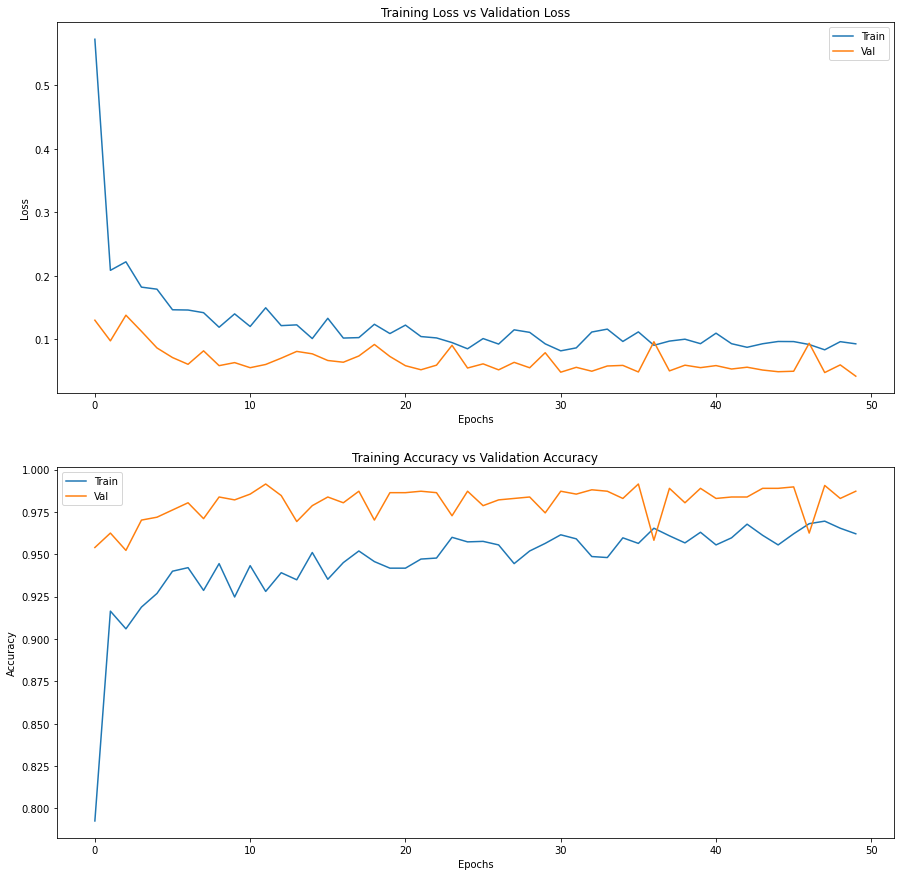

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [10]:
head_model.save("mymodel_vgg1")

INFO:tensorflow:Assets written to: mymodel_vgg1/assets


INFO:tensorflow:Assets written to: mymodel_vgg1/assets


In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [13]:
model = load_model("mymodel_vgg")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [4]:
tf.saved_model.save(model, "tmp_model")

INFO:tensorflow:Assets written to: tmp_model/assets


In [24]:
import cv2 
import json
import numpy as np
import onnx
import onnxruntime
from onnx import numpy_helper

In [28]:
img = cv2.imread("/media/omkar/omkar3/smart_store/2022-06-14 16:54:42.282751.jpg")

In [29]:
img = img/255
img = cv2.resize(img, (224, 224))
img = img.reshape((1,224,224,3))

In [15]:
data = json.dumps({"data": img.tolist()})
data = np.array(json.loads(data)["data"]).astype(np.float32)
session = onnxruntime.InferenceSession("model.onnx", None)
input_name = session.get_inputs()[0].name
ouput_name = session.get_outputs()[0].name

In [16]:
result = session.run([ouput_name], {input_name: data})


Predicted:  0


In [20]:
result[0][0][0]

0.99999964

In [30]:
head_model.predict(img)

array([[4.683219e-05]], dtype=float32)

In [32]:
format(head_model.predict(img)[0][0],".5f")

'0.00005'

In [29]:
train_Data.num_classes

NameError: name 'train_Data' is not defined

In [20]:
model_file_path ="transfer_model.h5"
head_model.save(model_file_path)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model = load_model("transfer_model.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("model.tflite", "wb") .write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmp6tjfe8ed/assets


260243868

In [2]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

In [3]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [15]:
import numpy as np

In [22]:
input_data = np.array(img, dtype=np.float32)

In [23]:
interpreter.set_tensor(input_details[0]['index'], input_data)

In [24]:
interpreter.invoke()

In [25]:
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.99999964]]


In [5]:
output_details

[{'name': 'Identity',
  'index': 56,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

In [2]:
from sympy import Point, Line
from sympy import Point, Line
p1, p2, p3 = Point(0, 0), Point(2, 3), Point(-2, 2)
l1 = Line(p1, p2)
l2 = l1.perpendicular_line(p3)
p3 in l2

True

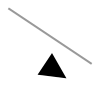

In [3]:
l2.

In [1]:
from shapely.geometry import LineString

a = (210, 554)
b = (140, 968)
cd_length = 6

ab = LineString([a, b])
cd = LineString([(52, 577), (249, 610)])

In [2]:
ab.intersects(cd)

True

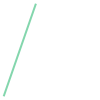

In [12]:
ab

In [ ]:
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (0, 1)])

In [4]:
polygon.bounds

(0.0, 0.0, 1.0, 1.0)

In [1]:
!pip install onnx2pytorch

     |████████████████████████████████| 44 kB 253 kB/s eta 0:00:01


In [2]:
import onnx
from onnx2pytorch import ConvertModel

onnx_model = onnx.load("model_mob.onnx")
pytorch_model = ConvertModel(onnx_model)

/home/omkar/anaconda3/envs/yolov5/lib/python3.7/site-packages/onnx2pytorch/convert/layer.py:30: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)
  layer.weight.data = torch.from_numpy(numpy_helper.to_array(weight))


In [4]:
type(pytorch_model)

onnx2pytorch.convert.model.ConvertModel

In [1]:
import torch

In [6]:
torch.save(pytorch_model, "mobilenet.pt")

In [2]:
torch.cuda.is_available()

True

In [2]:
model = torch.load("mobilenet.pt")

In [3]:
model.eval()

ConvertModel(
  (Transpose_StatefulPartitionedCall/model/Conv1/Conv2D__6:0): Transpose()
  (Conv_StatefulPartitionedCall/model/bn_Conv1/FusedBatchNormV3:0): Sequential(
    (0): ConstantPad2d(padding=(0, 1, 0, 1), value=0)
    (1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  )
  (Clip_StatefulPartitionedCall/model/Conv1_relu/Relu6:0): Clip()
  (Conv_StatefulPartitionedCall/model/expanded_conv_depthwise_BN/FusedBatchNormV3:0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32)
  (Clip_StatefulPartitionedCall/model/expanded_conv_depthwise_relu/Relu6:0): Clip()
  (Conv_StatefulPartitionedCall/model/expanded_conv_project_BN/FusedBatchNormV3:0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
  (Conv_StatefulPartitionedCall/model/block_1_expand/Conv2D:0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (BatchNormalization_StatefulPartitionedCall/model/block_1_expand_BN/FusedBatchNormV3:0): BatchNormWrapper(
    (bnu): BatchNormUnsafe(96, ep

In [4]:
model = model.cuda()

In [6]:
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[[[-3.0146e-01, -5.0456e-01, -1.2525e-01],
          [ 5.0080e-01,  6.8023e-01,  3.0776e-01],
          [-1.7509e-01,  9.3638e-03, -1.5900e-01]],

         [[-5.6011e-01, -8.2570e-01, -1.8368e-01],
          [ 9.1713e-01,  1.2145e+00,  3.9647e-01],
          [-2.9190e-01, -4.5335e-02, -1.8379e-01]],

         [[-1.8687e-01, -2.3072e-01, -1.0055e-01],
          [ 2.8263e-01,  3.5309e-01,  1.2282e-01],
          [-9.9098e-02,  3.3717e-03, -7.1958e-02]]],


        [[[-1.4902e+00,  1.5674e+00, -2.4313e-01],
          [-2.0844e+00,  1.7303e+00,  4.4491e-01],
          [-1.3105e-01,  6.0078e-01, -4.6938e-01]],

         [[-2.7233e+00,  2.8625e+00, -3.7816e-01],
          [-3.4594e+00,  2.9378e+00,  6.9191e-01],
          [-6.4776e-02,  8.2793e-01, -8.4302e-01]],

         [[-8.2384e-01,  9.5623e-01, -1.5978e-01],
          [-8.9369e-01,  7.8878e-01,  1.6573e-01],
          [-6.2091e-02,  3.4223e-01, -3.1580e-01]]],


        [[[ 6.1057e-01, -1.3531e+00, -1.7633

In [9]:
img = torch.FloatTensor(img).cuda()

In [10]:
img.device

device(type='cuda', index=0)

In [11]:
model(img)

RuntimeError: shape '[-1, 62720]' is invalid for input of size 414720

In [ ]:
(224*224)*3

In [ ]:
import cv2

In [21]:
img = cv2.imread("2022-06-14 16:54:42.282751.jpg")

In [22]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [23]:
img = cv2.resize(img,(224,224))

In [24]:
img = img.astype("float32")/255.0

In [25]:
import numpy as np

In [26]:
img = np.transpose(img,(2,0,1))
img = np.expand_dims(img,0)

In [27]:
img.shape

(1, 3, 224, 224)

In [32]:
img = torch.FloatTensor(img).cuda()

In [34]:
img.shape

torch.Size([1, 3, 224, 224])

In [35]:
model(img)

RuntimeError: Given groups=1, weight of size [32, 3, 3, 3], expected input[1, 224, 4, 225] to have 3 channels, but got 224 channels instead